
#Solución de compuerta OR Ejercicio 3 - Guía de Gradiente Descendente
##Hecho por **Carlos Doffiny S-V**




##Imports

In [1]:
import numpy as np #Para los diferentes vectores y matrices que se usarán
import matplotlib.pyplot as plt #Para graficar
import tensorflow as tf #Para el aprendizaje automático y entrenamiento de las redes
from tensorflow.keras.models import Sequential #Se usará una arquitectura secuencial
from tensorflow.keras.layers import Dense #Para la caja negra, que será llenada con capas densas
from tensorflow.keras.utils import plot_model #Para mostrar el resumen de la arquitectura en bloques
from tensorflow.keras.callbacks import TensorBoard #Para el Tensorboard
import datetime, os #Para el tensorboard

##Data de entrada

In [2]:
x_train = np.array([[0,0],[0,1],[1,0],[1,1]]) #Características o feature de la data entrante. Esta será nuestra data de entrenamiento
print(x_train.shape) #Dimensiones de las características
print(x_train)
y_train = np.array([0,1,1,1]) #Target o salida deseada. Esta será nuestra data de target
print(y_train.shape) #Dimensiones del target
print(y_train)

(4, 2)
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(4,)
[0 1 1 1]


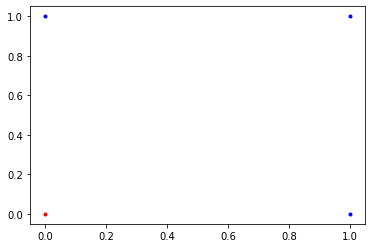

In [3]:
plt.plot(x_train[0,0], x_train[0,1], '.r') #Graficando las salidas de la compuerta OR. En azul los 1 y en rojo los 0
plt.plot(x_train[1,0], x_train[1,1], '.b')
plt.plot(x_train[2,0], x_train[2,1], '.b')
plt.plot(x_train[3,0], x_train[3,1], '.b')

In [4]:
input_dim = x_train.shape[1] #Dimensión de entrada (cantidad de características de la data entrante, es decir, variables de entrada)
num_class =  1 #Número de clases (cantidad de neuronas de salidas)

print(input_dim)
print(num_class)

2
1


##Arquitectura del modelo

In [5]:
def model():
  model = Sequential() #Creando la caja negra con arquitectura secuencial

  # ADALINE (Comentar estas líneas si se quiere utilizar el modelo de la red multicapa superficial)

  # model.add(Dense(num_class, input_dim = input_dim, activation='linear')) #Agregando una capa (en este caso la única capa que tendremos)

  # MULTICAPA (Comentar estas líneas si se quiere utilizar el modelo de la red Adaline)

  model.add(Dense(12, input_dim = input_dim, activation='tanh'))
  model.add(Dense(12, activation = 'tanh'))
  model.add(Dense(1, activation = 'linear'))

  model.summary() #Resumen del modelo

  opt = tf.keras.optimizers.SGD(learning_rate=0.04) #Optimizador (Gradiente descendente estocástico en este caso)

  model.compile(loss = 'mean_squared_error', optimizer = opt) #Compilando el modelo, estableciendo la función de pérdida y el optimizador

  return model #Retornando el model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                36        
                                                                 
 dense_1 (Dense)             (None, 12)                156       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 205
Trainable params: 205
Non-trainable params: 0
_________________________________________________________________


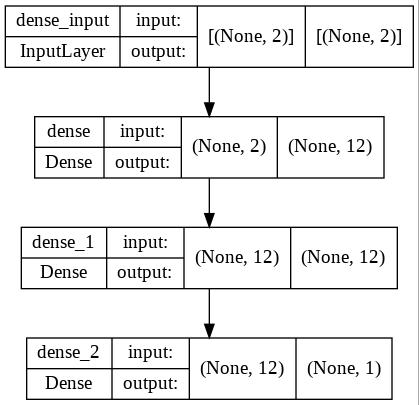

In [6]:
model = model() #Param: las dos entradas, más el bias. Output shape indica que se tiene solo una neurona.

plot_model(model, to_file='model.jpg', show_shapes=True) #Para mostrar el resumen de la arquitectura

## Creación del Tensorboard


In [7]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

##Entrenando el modelo y sus neuronas

In [8]:
history = model.fit(x_train,y_train, epochs = 150, batch_size=1, callbacks = [tensorboard_callback], verbose = 0) #Histórico del aprendizaje de la neurona. Se ingresa feature y target de entrada, núm de épocas (cuántas veces se actualizarán los pesos y los gradientes) y el tamaño del lote a usar.

#Ahora también le pasamos el callback del TensorBoard

In [9]:
score = model.evaluate(x_train, y_train, verbose=0) #Para mostrar la pérdida

print('loss:',score)

loss: 2.7330424927640706e-05


##Graficar Pérdida

Text(0.5, 1.0, 'Epochs vs Loss')

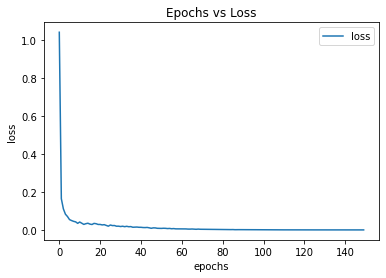

In [10]:
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Epochs vs Loss')

In [11]:
%load_ext tensorboard
%tensorboard --logdir logs

<IPython.core.display.Javascript object>

##Predicción

In [12]:
outputTrain = model.predict(x_train) ##Datos de predicción luego del entrenamiento. Esto indicará que también predijo las y

print(outputTrain)
print(outputTrain.shape)


[[0.00492305]
 [0.9994375 ]
 [0.9979858 ]
 [1.008984  ]]
(4, 1)


In [13]:
result = (outputTrain > 0.7)+0 #Se hace un umbral de rechazo, en donde si llegamos a un punto determinado, podemos normalizar nuestra salida
print(result) #Esto imprime nuestro resultado deseado de este modelo, que es lograr entrenar una neurona para una compuerta OR.

[[0]
 [1]
 [1]
 [1]]


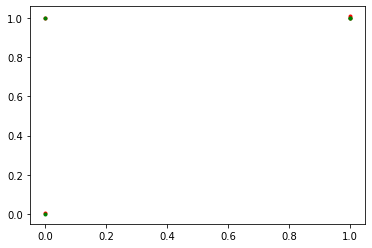

In [14]:
plt.plot(x_train[:,0],outputTrain, '.r', x_train[:,0],y_train, '.g') #En rojo están los datos entrenados, y en verde los reales